In [1]:
# Data Manipulation, Linear Algebra
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Keras


from sklearn.cluster import KMeans

from sklearn import svm, tree, linear_model, neighbors, discriminant_analysis, neural_network

import warnings
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
PATH = "./drive/MyDrive/Colab Notebooks/Machine Learning/trainDataset.xlsx"

In [4]:
df = pd.read_excel(PATH, na_values=999)

In [5]:
df.head()

,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1.0,144.0,41.0,0.0,0.0,0.0,1.0,3.0,3.0,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0.0,142.0,39.0,1.0,1.0,0.0,0.0,3.0,3.0,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1.0,135.0,31.0,0.0,0.0,0.0,1.0,2.0,1.0,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0.0,12.0,35.0,0.0,0.0,0.0,1.0,3.0,3.0,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0.0,109.0,61.0,1.0,0.0,0.0,0.0,2.0,1.0,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [6]:
df.shape

(400, 120)

In [7]:
data = df.dropna(axis=0)

In [8]:
data_clinical = data.iloc[:,1:13]
data_image = data.iloc[:,13:]

In [9]:
data_image.shape

(390, 107)

In [10]:
data_clinical = data_clinical.drop(columns=['pCR (outcome)'])

In [11]:
data_clinical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 399
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   RelapseFreeSurvival (outcome)  390 non-null    float64
 1   Age                            390 non-null    float64
 2   ER                             390 non-null    float64
 3   PgR                            390 non-null    float64
 4   HER2                           390 non-null    float64
 5   TrippleNegative                390 non-null    float64
 6   ChemoGrade                     390 non-null    float64
 7   Proliferation                  390 non-null    float64
 8   HistologyType                  390 non-null    float64
 9   LNStatus                       390 non-null    float64
 10  TumourStage                    390 non-null    float64
dtypes: float64(11)
memory usage: 36.6 KB


In [12]:
data_clinical.head()

,RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage
0,144.0,41.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,2.0
1,142.0,39.0,1.0,1.0,0.0,0.0,3.0,3.0,1.0,1.0,2.0
2,135.0,31.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,2.0
3,12.0,35.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,3.0
4,109.0,61.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,2.0


In [13]:
data_clinical.isnull().sum()

RelapseFreeSurvival (outcome)    0
Age                              0
ER                               0
PgR                              0
HER2                             0
TrippleNegative                  0
ChemoGrade                       0
Proliferation                    0
HistologyType                    0
LNStatus                         0
TumourStage                      0
dtype: int64

In [14]:
data_image.isnull().sum().sum()

0

In [52]:
train_img_X = data_image

# Clinical Data Analysis

In [16]:
data_clinical.columns

Index(['RelapseFreeSurvival (outcome)', 'Age', 'ER', 'PgR', 'HER2',
       'TrippleNegative', 'ChemoGrade', 'Proliferation', 'HistologyType',
       'LNStatus', 'TumourStage'],
      dtype='object')

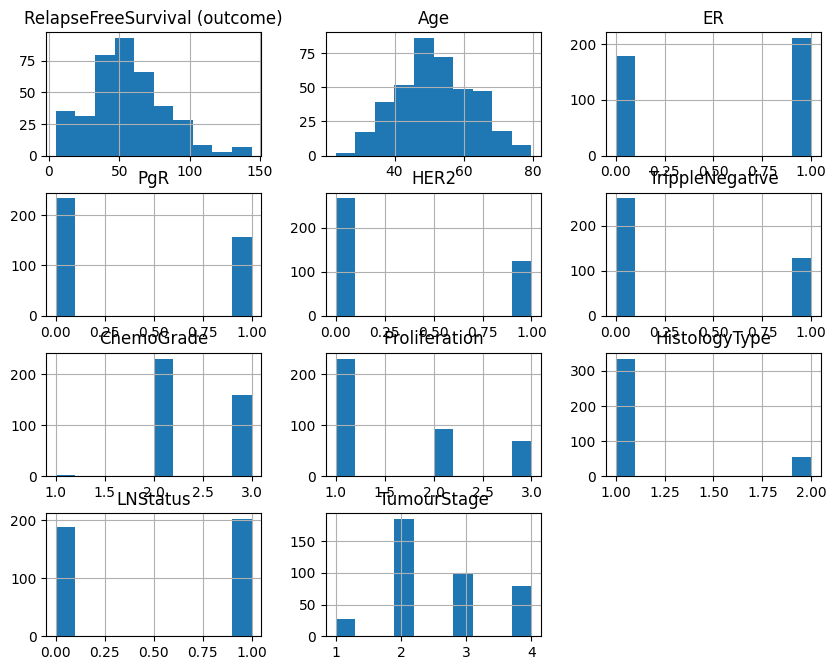

In [17]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (10, 8)
data_clinical[['RelapseFreeSurvival (outcome)', 'Age', 'ER', 'PgR',
       'HER2', 'TrippleNegative', 'ChemoGrade', 'Proliferation',
       'HistologyType', 'LNStatus', 'TumourStage']].hist()
plt.show()

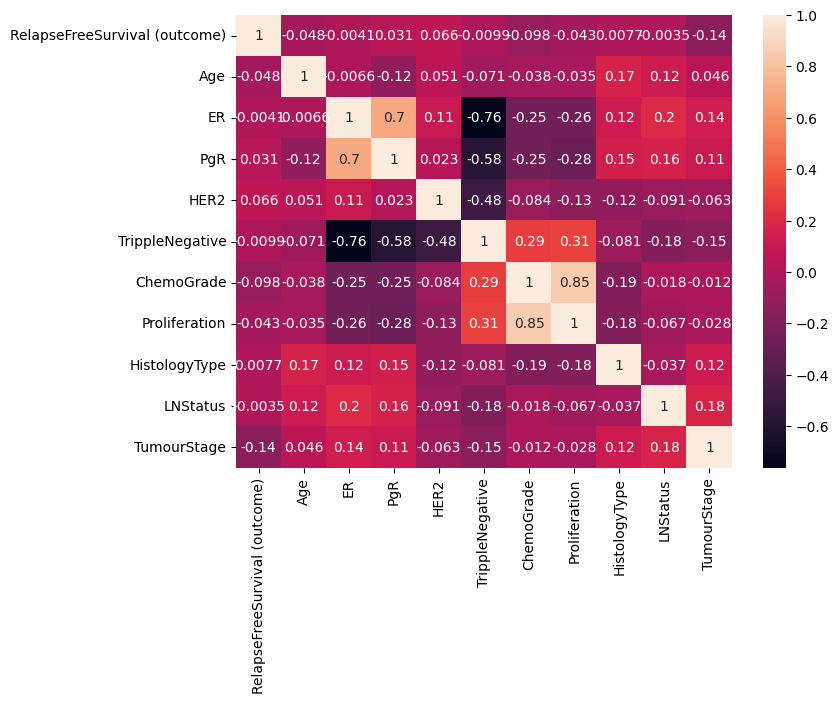

In [18]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (8, 6)
sns.heatmap(data_clinical.corr(), annot=True)
plt.show()

RelapseFreeSurvival (outcome)       AxesSubplot(0.125,0.799681;0.168478x0.0803191)
Age                              AxesSubplot(0.327174,0.799681;0.168478x0.0803191)
ER                               AxesSubplot(0.529348,0.799681;0.168478x0.0803191)
PgR                              AxesSubplot(0.731522,0.799681;0.168478x0.0803191)
HER2                                AxesSubplot(0.125,0.703298;0.168478x0.0803191)
TrippleNegative                  AxesSubplot(0.327174,0.703298;0.168478x0.0803191)
ChemoGrade                       AxesSubplot(0.529348,0.703298;0.168478x0.0803191)
Proliferation                    AxesSubplot(0.731522,0.703298;0.168478x0.0803191)
HistologyType                       AxesSubplot(0.125,0.606915;0.168478x0.0803191)
LNStatus                         AxesSubplot(0.327174,0.606915;0.168478x0.0803191)
TumourStage                      AxesSubplot(0.529348,0.606915;0.168478x0.0803191)
dtype: object

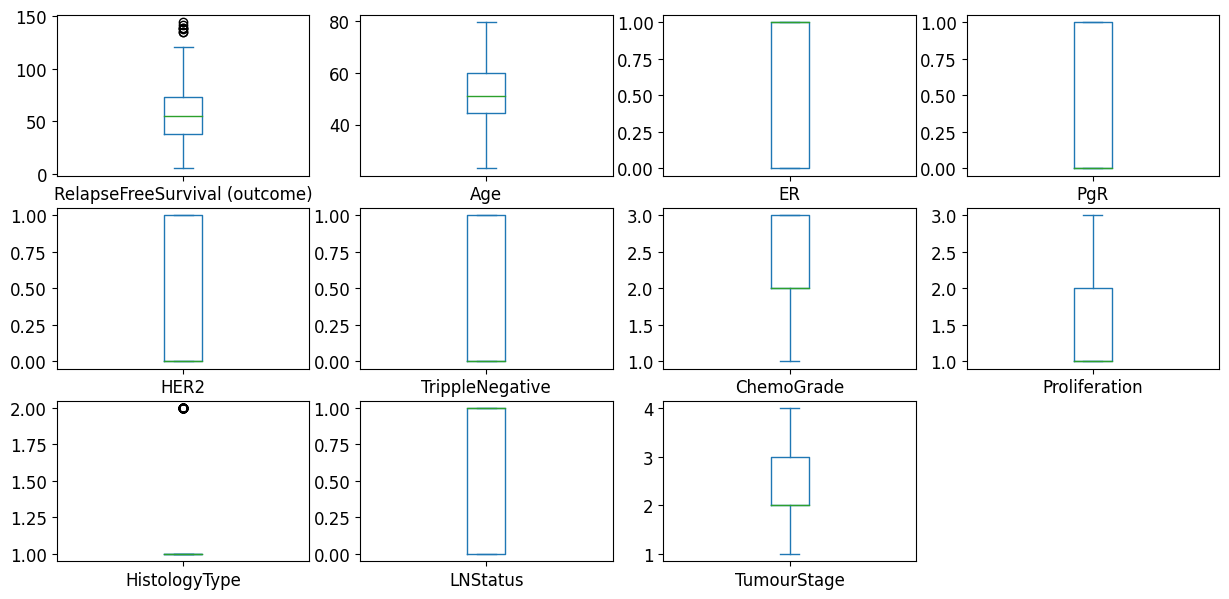

In [19]:
data_clinical.plot(kind='box', subplots=True, layout=(8,4), sharex=False,
sharey=False, fontsize=12, figsize=(15,20))

# Regression task



## Clinical Data feature selection

In [75]:
train_Y = data_clinical['RelapseFreeSurvival (outcome)']
train_X_cl = data_clinical.drop(columns=['RelapseFreeSurvival (outcome)'])

In [76]:
# create an object of the RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=10)

# fit the model with the training data
model_RFR.fit(train_X_cl, train_Y)

RandomForestRegressor(max_depth=10)

# Feature Selection for the clinical data

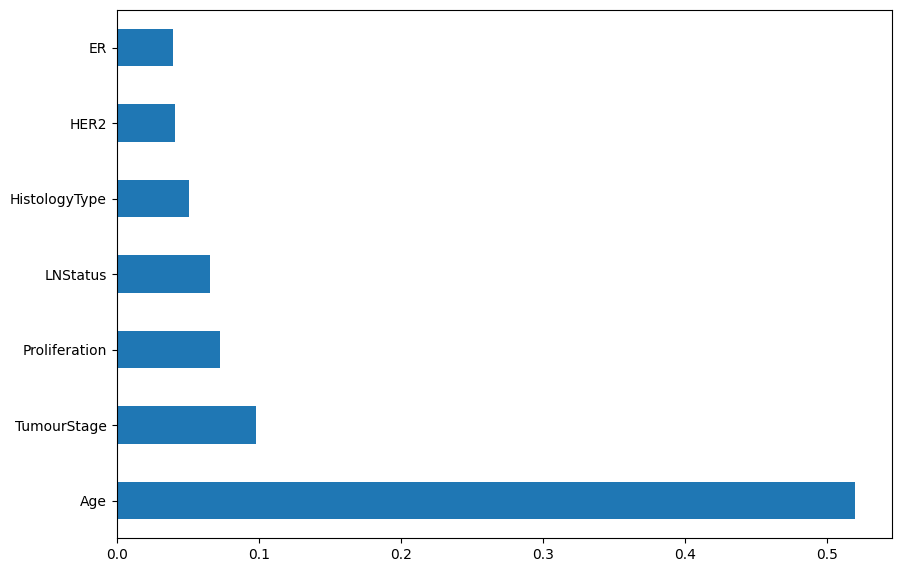

In [77]:
plt.figure(figsize=(10,7))
feat_importances_cl = pd.Series(model_RFR.feature_importances_, index = train_X_cl.columns)
feat_importances_cl.nlargest(7).plot(kind='barh');

In [78]:
feat_importances_cl = feat_importances_cl.nlargest(7)
feat_importances_cl.index

Index(['Age', 'TumourStage', 'Proliferation', 'LNStatus', 'HistologyType',
       'HER2', 'ER'],
      dtype='object')

In [79]:
train_X_cl_if =  train_X_cl[list(feat_importances_cl.index)]

In [80]:
train_X_cl_if.shape

(390, 7)

# Feature Selection for Image data

In [40]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(train_img_X, train_Y)

RandomForestRegressor()

<BarContainer object of 107 artists>

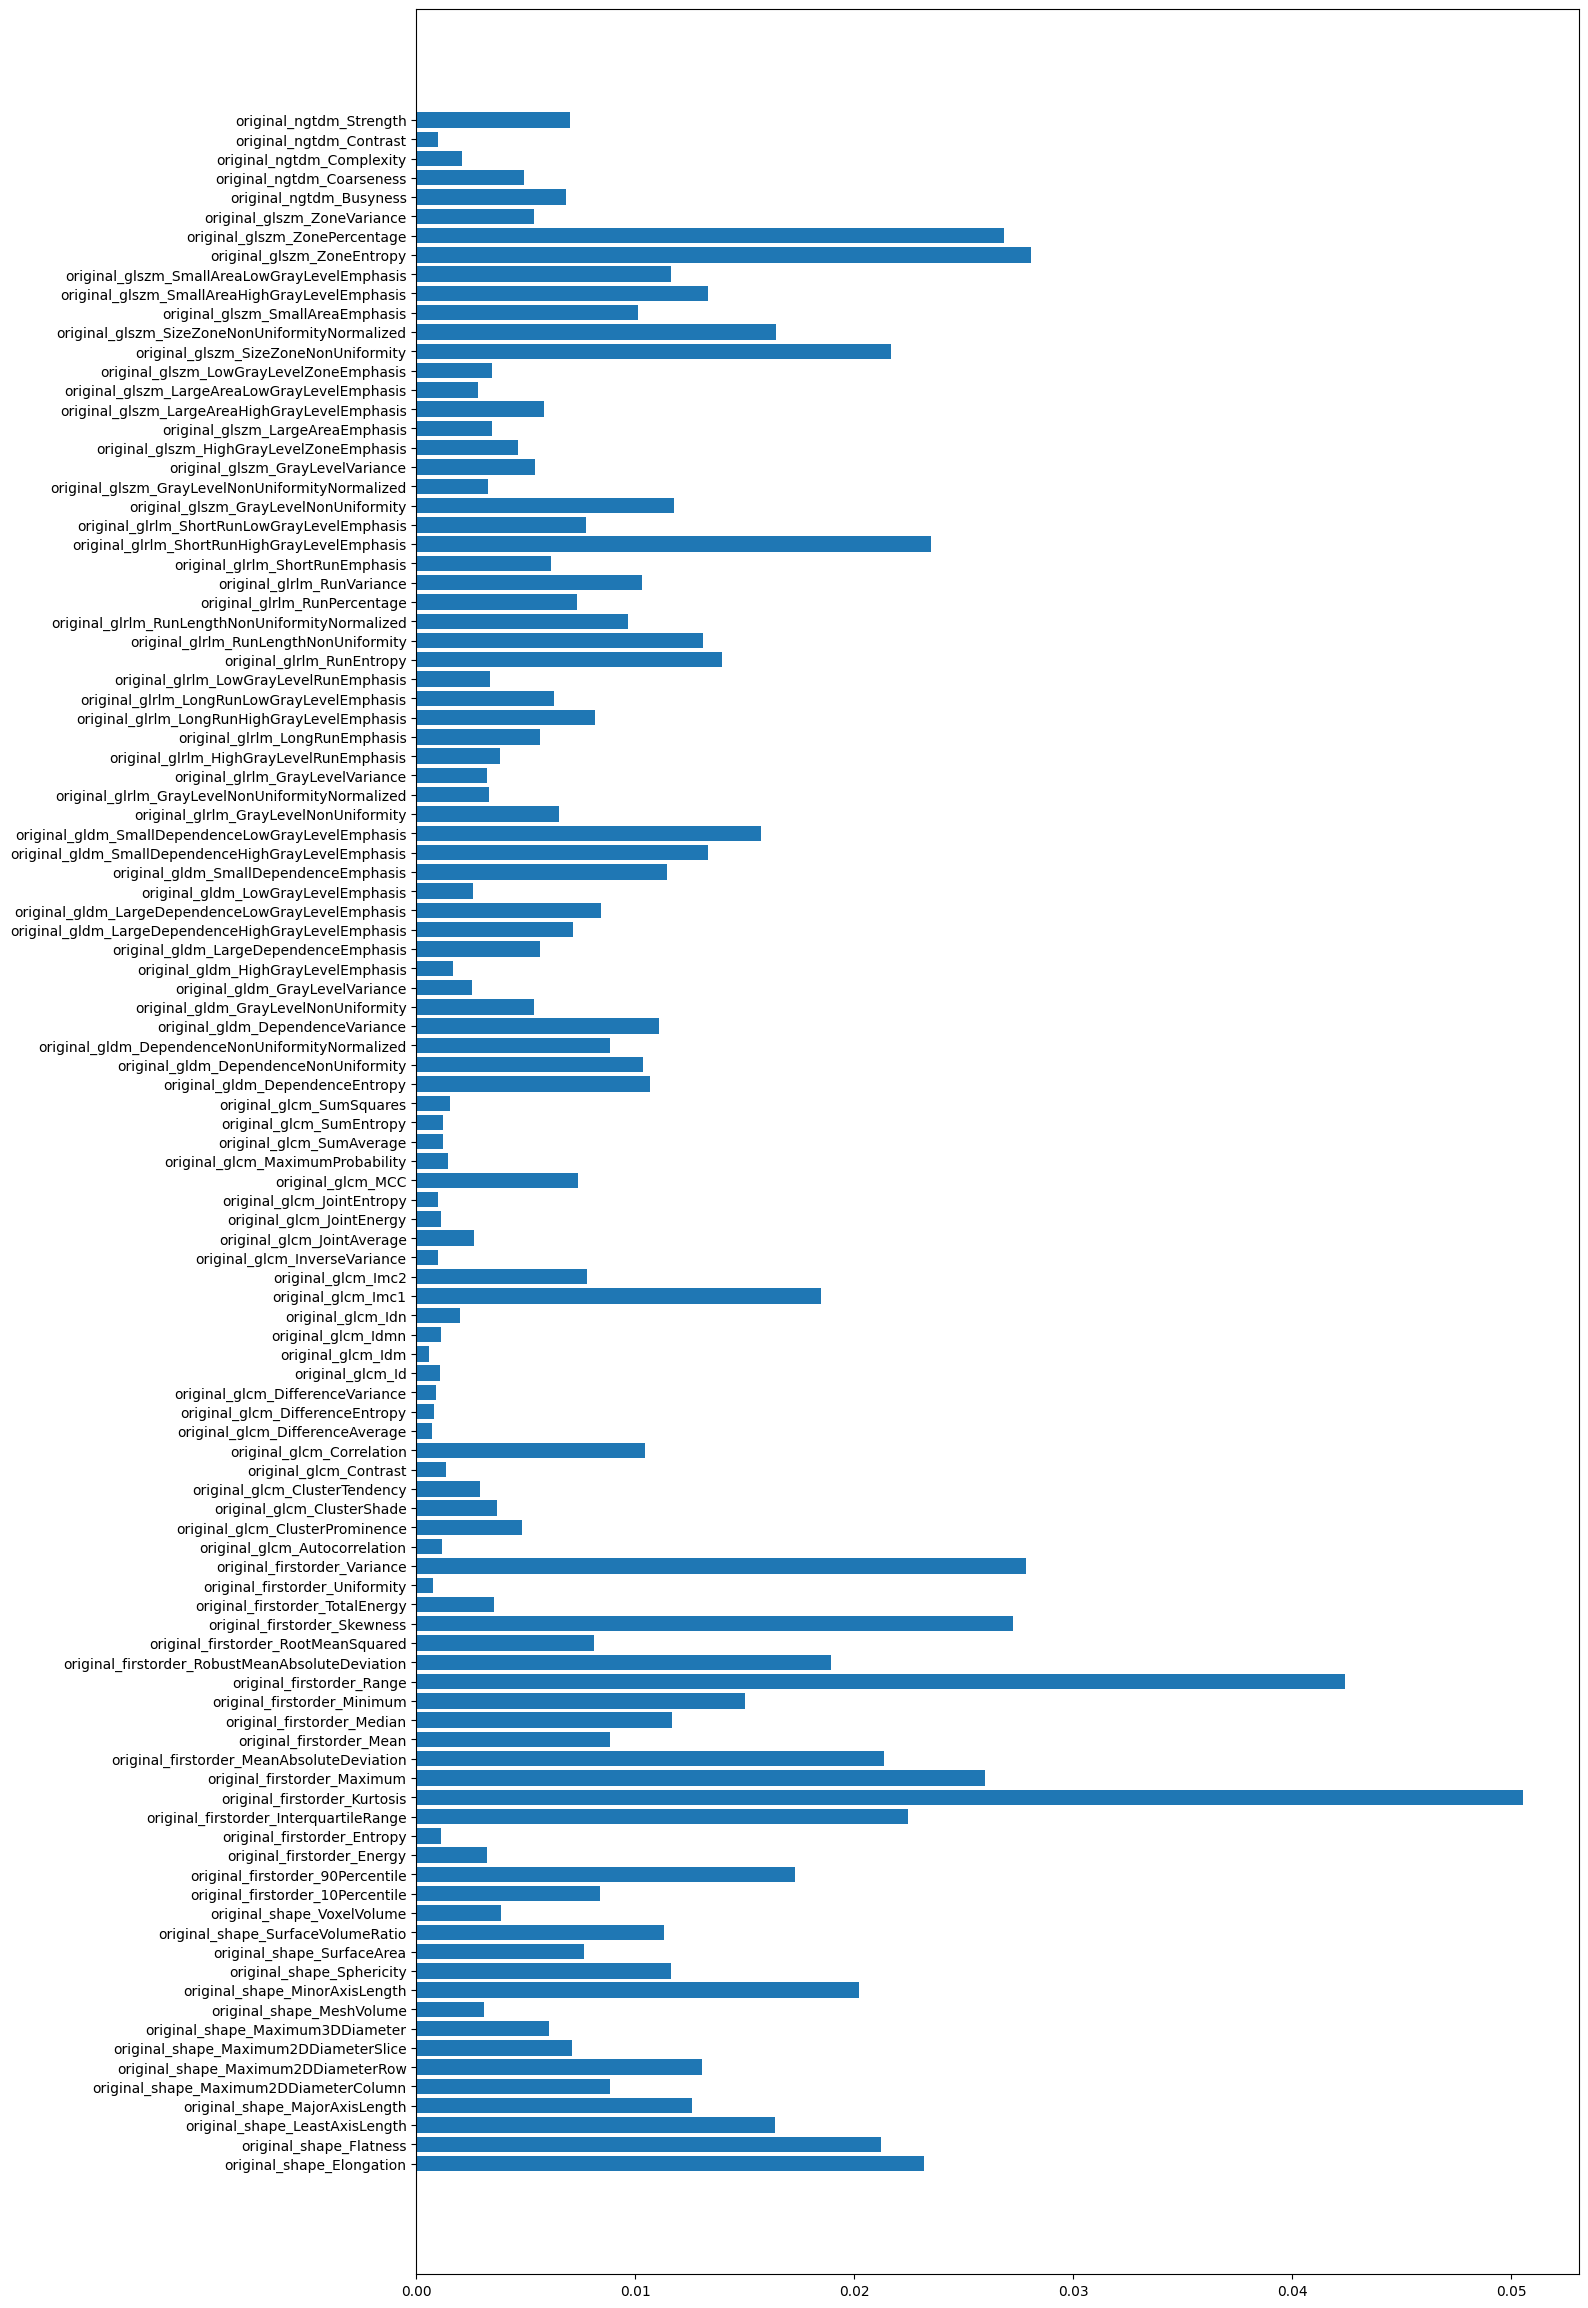

In [41]:
plt.figure(figsize=(15,30))
plt.barh(train_img_X.columns, rf.feature_importances_)

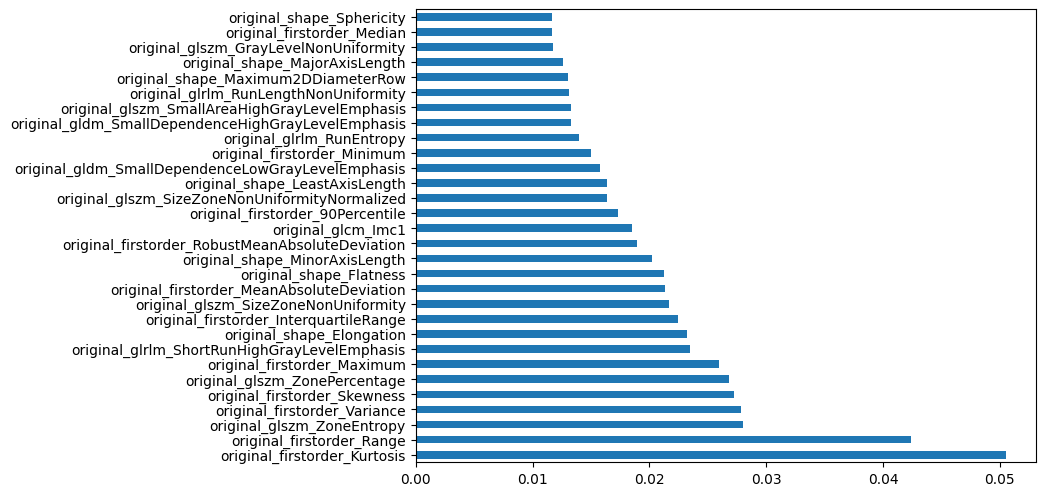

In [53]:
feat_importances = pd.Series(rf.feature_importances_, index = train_img_X.columns)
feat_importances.nlargest(30).plot(kind='barh');

In [61]:
feat_importances = feat_importances.nlargest(30)

In [65]:
type(feat_importances.index)

pandas.core.indexes.base.Index

In [67]:
train_img_X_if = train_img_X[list(feat_importances.index)]

In [68]:
train_img_X_if.shape

(390, 30)

# Create the final feature variable dataframe

In [82]:
train_data = pd.concat([train_X_cl_if, train_img_X_if], axis=1)

In [83]:
train_data.shape

(390, 37)

# train test slip

In [84]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_Y, test_size=0.25, random_state=12)

In [85]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(292, 37) (98, 37) (292,) (98,)
